In [2]:
import pandas as pd

# Go up one level, then into data/
df = pd.read_csv("../data/telematics_data.csv")


# Quick overview
print(df.shape)
print(df.head())
print(df['driver_profile'].value_counts())

# Check distributions
df['speed_kph'].describe()
df['acceleration_ms2'].describe()
df[['harsh_braking','harsh_acceleration']].mean()


(254370, 10)
                    timestamp   latitude  longitude  speed_kph  \
0  2025-08-08 14:01:44.790695  43.156868 -77.608342  56.680654   
1  2025-08-08 14:01:54.790695  43.155681 -77.608394  57.610623   
2  2025-08-08 14:02:04.790695  43.156415 -77.608439  45.950469   
3  2025-08-08 14:02:14.790695  43.155976 -77.607564  75.512960   
4  2025-08-08 14:02:24.790695  43.156437 -77.607733  50.614529   

   acceleration_ms2  harsh_braking  harsh_acceleration driver_id  \
0          0.000000          False               False     D0000   
1          0.025832          False               False     D0000   
2         -0.323893          False               False     D0000   
3          0.821180          False               False     D0000   
4         -0.691623          False               False     D0000   

  driver_profile     trip_id  
0       moderate  D0000_T000  
1       moderate  D0000_T000  
2       moderate  D0000_T000  
3       moderate  D0000_T000  
4       moderate  D0000_T0

harsh_braking         0.000008
harsh_acceleration    0.000008
dtype: float64

In [3]:
# Step 3: Aggregate point-level data to trip-level features
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (adjust relative path if needed)
df = pd.read_csv("../data/telematics_data.csv")

# --- Aggregate to trip-level features ---
trip_features = df.groupby(['trip_id','driver_id','driver_profile']).agg(
    mean_speed=('speed_kph','mean'),
    max_speed=('speed_kph','max'),
    std_speed=('speed_kph','std'),
    harsh_brake_rate=('harsh_braking','mean'),
    harsh_accel_rate=('harsh_acceleration','mean'),
    mean_acceleration=('acceleration_ms2','mean'),
    trip_duration=('timestamp', lambda x: (pd.to_datetime(x).max() - pd.to_datetime(x).min()).total_seconds()/60)
).reset_index()

print("✅ Aggregation complete. Sample of trip-level features:")
trip_features.head()


✅ Aggregation complete. Sample of trip-level features:


,trip_id,driver_id,driver_profile,mean_speed,max_speed,std_speed,harsh_brake_rate,harsh_accel_rate,mean_acceleration,trip_duration
0,D0000_T000,D0000,moderate,71.705959,105.834151,14.848973,0.0,0.0,0.016788,11.833333
1,D0000_T001,D0000,moderate,71.955253,104.437315,13.534168,0.0,0.0,0.007070,13.833333
2,D0000_T002,D0000,moderate,74.310512,121.615638,14.861787,0.0,0.0,0.000621,39.833333
3,D0000_T003,D0000,moderate,75.930503,120.254431,16.165001,0.0,0.0,0.003242,22.833333
4,D0000_T004,D0000,moderate,76.047810,110.872356,14.293920,0.0,0.0,0.001171,15.833333


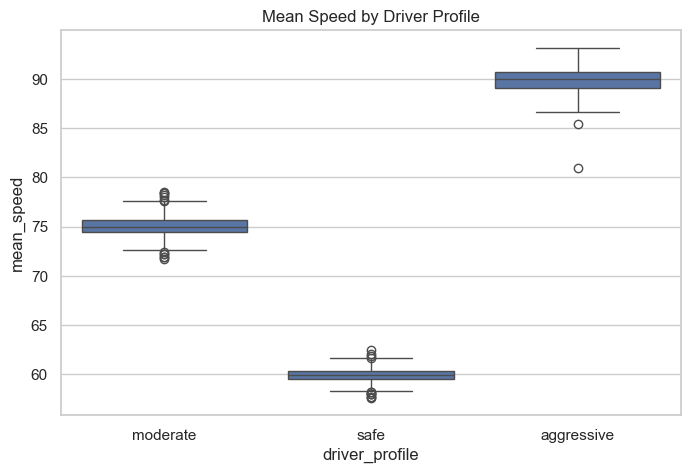

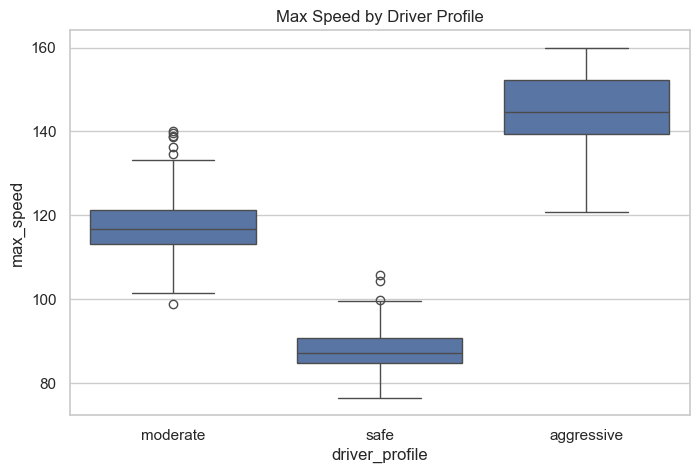

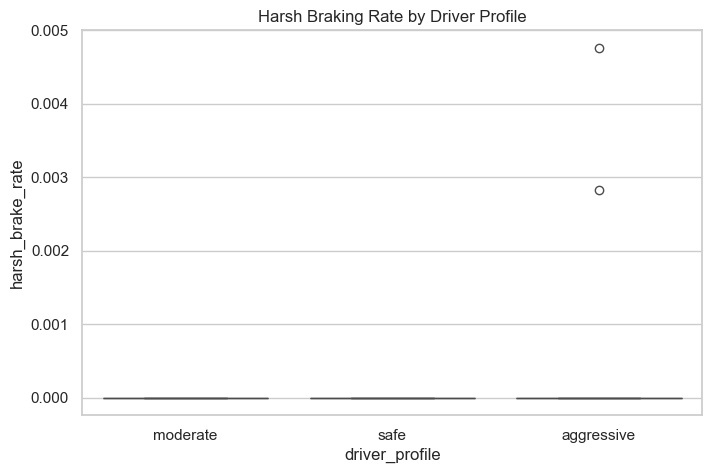

In [4]:
# Step 4: Quick exploratory visualization
sns.set(style="whitegrid")

# Mean Speed by Driver Profile
plt.figure(figsize=(8,5))
sns.boxplot(data=trip_features, x='driver_profile', y='mean_speed')
plt.title('Mean Speed by Driver Profile')
plt.show()

# Max Speed by Driver Profile
plt.figure(figsize=(8,5))
sns.boxplot(data=trip_features, x='driver_profile', y='max_speed')
plt.title('Max Speed by Driver Profile')
plt.show()

# Harsh Braking Rate by Driver Profile
plt.figure(figsize=(8,5))
sns.boxplot(data=trip_features, x='driver_profile', y='harsh_brake_rate')
plt.title('Harsh Braking Rate by Driver Profile')
plt.show()


In [1]:
import pandas as pd

# Load the professionally engineered, hybrid feature set
df = pd.read_csv('../data/driver_features_hybrid.csv')

print("✅ Successfully loaded hybrid driver features.")
print(f"Dataset shape: {df.shape}")
df.head()

✅ Successfully loaded hybrid driver features.
Dataset shape: (50, 31)


,driver_id,driver_profile,avg_trip_speed,max_overall_speed,avg_trip_duration_mins,avg_harsh_brake_rate,avg_harsh_accel_rate,speed_consistency,total_trips,total_driving_time,...,speed_risk_score,harsh_events_risk_score,exposure_risk_score,overall_risk_score,risk_category,recommended_annual_premium,premium_adjustment_pct,qualifies_for_discount,requires_surcharge,predicted_claims_likelihood
0,D0000,moderate,74.974159,121.765726,35.25,0.0,0.0,1.680514,20,705.0,...,6499.9,0.0,100.0,49.2,Medium Risk,2032.0,69.3,False,False,0.074
1,D0001,moderate,75.007357,128.964486,46.10,0.0,0.0,0.963463,20,922.0,...,5973.6,0.0,100.0,46.9,Medium Risk,2010.0,67.5,False,False,0.070
2,D0002,safe,59.980696,99.110526,46.65,0.0,0.0,0.744905,20,933.0,...,2440.1,0.0,100.0,31.0,Medium Risk,1858.0,54.8,False,False,0.046
3,D0003,moderate,75.005100,130.525681,33.60,0.0,0.0,0.876469,20,672.0,...,5949.3,0.0,100.0,46.8,Medium Risk,2009.0,67.4,False,False,0.070
4,D0004,moderate,75.032261,133.159773,47.15,0.0,0.0,0.856357,20,943.0,...,6079.0,0.0,100.0,47.4,Medium Risk,2015.0,67.9,False,False,0.071
